In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

      Frequency               V(V0)                
0                  1.000000                0.999962
1                  1.258925                0.999962
2                  1.584893                0.999962
3                  1.995262                0.999962
4                  2.511886                0.999962
..                      ...                     ...
56            398107.170554                0.021190
57            501187.233627                0.017965
58            630957.344480                0.018629
59            794328.234724                0.021579
60           1000000.000000                0.025510

[61 rows x 2 columns]


<Axes: xlabel='Frequency'>

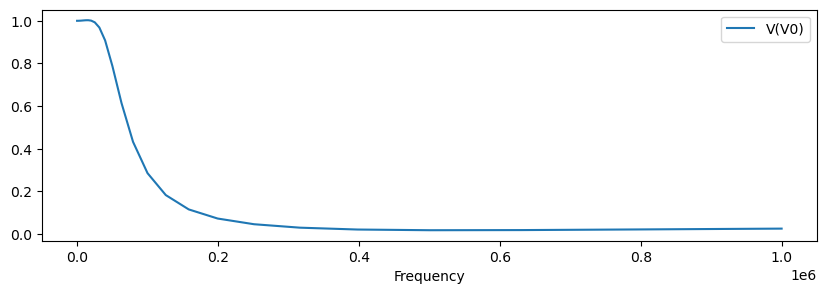

In [2]:
f0=pd.read_csv("Downloads/Mini project 2/F0.csv")
print(f0)
f0.columns = f0.columns.str.strip()
f0_selected = f0.iloc[:, 1:]
f0_selected = f0[['Frequency'] + list(f0.columns[1:])]
f0_selected.plot(x='Frequency', y=f0_selected.columns[1:], figsize=(10,3))

In [3]:
f1=pd.read_csv("Downloads/Mini project 2/F1.csv")
f2=pd.read_csv("Downloads/Mini project 2/F2.csv")
f3=pd.read_csv("Downloads/Mini project 2/F3.csv")
f4=pd.read_csv("Downloads/Mini project 2/F4.csv")
f5=pd.read_csv("Downloads/Mini project 2/F5.csv")
f6=pd.read_csv("Downloads/Mini project 2/F6.csv")
f7=pd.read_csv("Downloads/Mini project 2/F7.csv")
f8=pd.read_csv("Downloads/Mini project 2/F8.csv")
print("F1\n",f1)
print("F2\n",f2)
print("F3\n",f3)
print("F4\n",f4)
print("F5\n",f5)
print("F6\n",f6)
print("F7\n",f7)
print("F8\n",f8)

F1
       Frequency               V(V0)                
0                  1.000000                0.999961
1                  1.258925                0.999961
2                  1.584893                0.999961
3                  1.995262                0.999961
4                  2.511886                0.999961
..                      ...                     ...
56            398107.170554                0.016951
57            501187.233627                0.014377
58            630957.344480                0.014917
59            794328.234724                0.017293
60           1000000.000000                0.020468

[61 rows x 2 columns]
F2
       Frequency               V(V0)                
0                  1.000000                0.999962
1                  1.258925                0.999962
2                  1.584893                0.999962
3                  1.995262                0.999962
4                  2.511886                0.999962
..                      ...      

In [25]:
mca=pd.read_csv("Downloads/Mini project 2/Monte Carlo_200.csv")
mca

,Frequency,(V(V0))@1,(V(V0))@2,(V(V0))@3,(V(V0))@4,(V(V0))@5,(V(V0))@6,(V(V0))@7,(V(V0))@8,(V(V0))@9,...,(IMG(V(V0)))@191,(IMG(V(V0)))@192,(IMG(V(V0)))@193,(IMG(V(V0)))@194,(IMG(V(V0)))@195,(IMG(V(V0)))@196,(IMG(V(V0)))@197,(IMG(V(V0)))@198,(IMG(V(V0)))@199,(IMG(V(V0)))@200
0,1.000000,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,-0.000026,-0.000026,-0.000025,-0.000027,-0.000025,-0.000025,-0.000027,-0.000026,-0.000027,-0.000026
1,1.258925,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,-0.000033,-0.000033,-0.000032,-0.000034,-0.000032,-0.000032,-0.000034,-0.000033,-0.000034,-0.000032
2,1.584893,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,-0.000041,-0.000041,-0.000040,-0.000043,-0.000040,-0.000040,-0.000043,-0.000041,-0.000042,-0.000040
3,1.995262,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,-0.000052,-0.000052,-0.000051,-0.000054,-0.000050,-0.000050,-0.000054,-0.000052,-0.000053,-0.000051
4,2.511886,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,-0.000065,-0.000065,-0.000064,-0.000068,-0.000063,-0.000063,-0.000067,-0.000065,-0.000067,-0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,398107.170554,0.021190,0.019905,0.020274,0.020065,0.021567,0.020609,0.021766,0.021758,0.021275,...,0.014218,0.013495,0.014446,0.013110,0.014296,0.013968,0.013418,0.013252,0.013741,0.013778
57,501187.233627,0.017965,0.017433,0.017544,0.017071,0.018203,0.017505,0.018418,0.018411,0.018123,...,0.016843,0.015925,0.017171,0.015425,0.017001,0.016554,0.015897,0.015521,0.016375,0.016309
58,630957.344480,0.018629,0.018522,0.018483,0.017754,0.018818,0.018173,0.019077,0.019061,0.018874,...,0.019287,0.018180,0.019651,0.017636,0.019425,0.018876,0.018189,0.017686,0.018760,0.018609
59,794328.234724,0.021579,0.021691,0.021565,0.020594,0.021770,0.021062,0.022087,0.022062,0.021911,...,0.021521,0.020244,0.021893,0.019687,0.021599,0.020963,0.020282,0.019697,0.020908,0.020691


In [5]:
df = pd.read_csv("Downloads/Mini project 2/Monte Carlo_200.csv")
df.columns = df.columns.str.strip()
df_selected = df.iloc[:, 1:]
print(df_selected.head())

   (V(V0))@1  (V(V0))@2  (V(V0))@3  (V(V0))@4  (V(V0))@5  (V(V0))@6  \
0   0.999962   0.999961   0.999961   0.999962   0.999962   0.999961   
1   0.999962   0.999961   0.999961   0.999962   0.999962   0.999961   
2   0.999962   0.999961   0.999961   0.999962   0.999962   0.999961   
3   0.999962   0.999961   0.999961   0.999962   0.999962   0.999961   
4   0.999962   0.999961   0.999961   0.999962   0.999962   0.999961   

   (V(V0))@7  (V(V0))@8  (V(V0))@9  (V(V0))@10  ...  (IMG(V(V0)))@191  \
0   0.999962   0.999962   0.999961    0.999961  ...         -0.000026   
1   0.999962   0.999962   0.999961    0.999961  ...         -0.000033   
2   0.999962   0.999962   0.999961    0.999961  ...         -0.000041   
3   0.999962   0.999962   0.999961    0.999961  ...         -0.000052   
4   0.999962   0.999962   0.999961    0.999961  ...         -0.000065   

   (IMG(V(V0)))@192  (IMG(V(V0)))@193  (IMG(V(V0)))@194  (IMG(V(V0)))@195  \
0         -0.000026         -0.000025         -0.000027  

Text(0, 0.5, 'Amplitude')

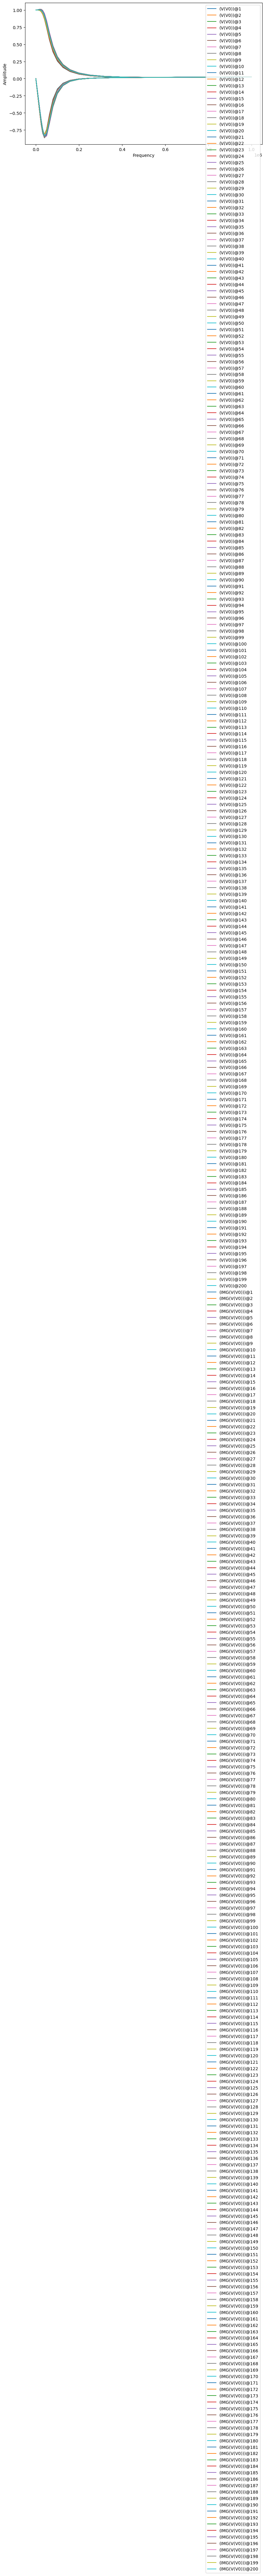

In [6]:
df_selected = df[['Frequency'] + list(df.columns[1:])]
df_selected.plot(x='Frequency', y=df_selected.columns[1:], figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

Text(0.5, 1.0, 'Real Values')

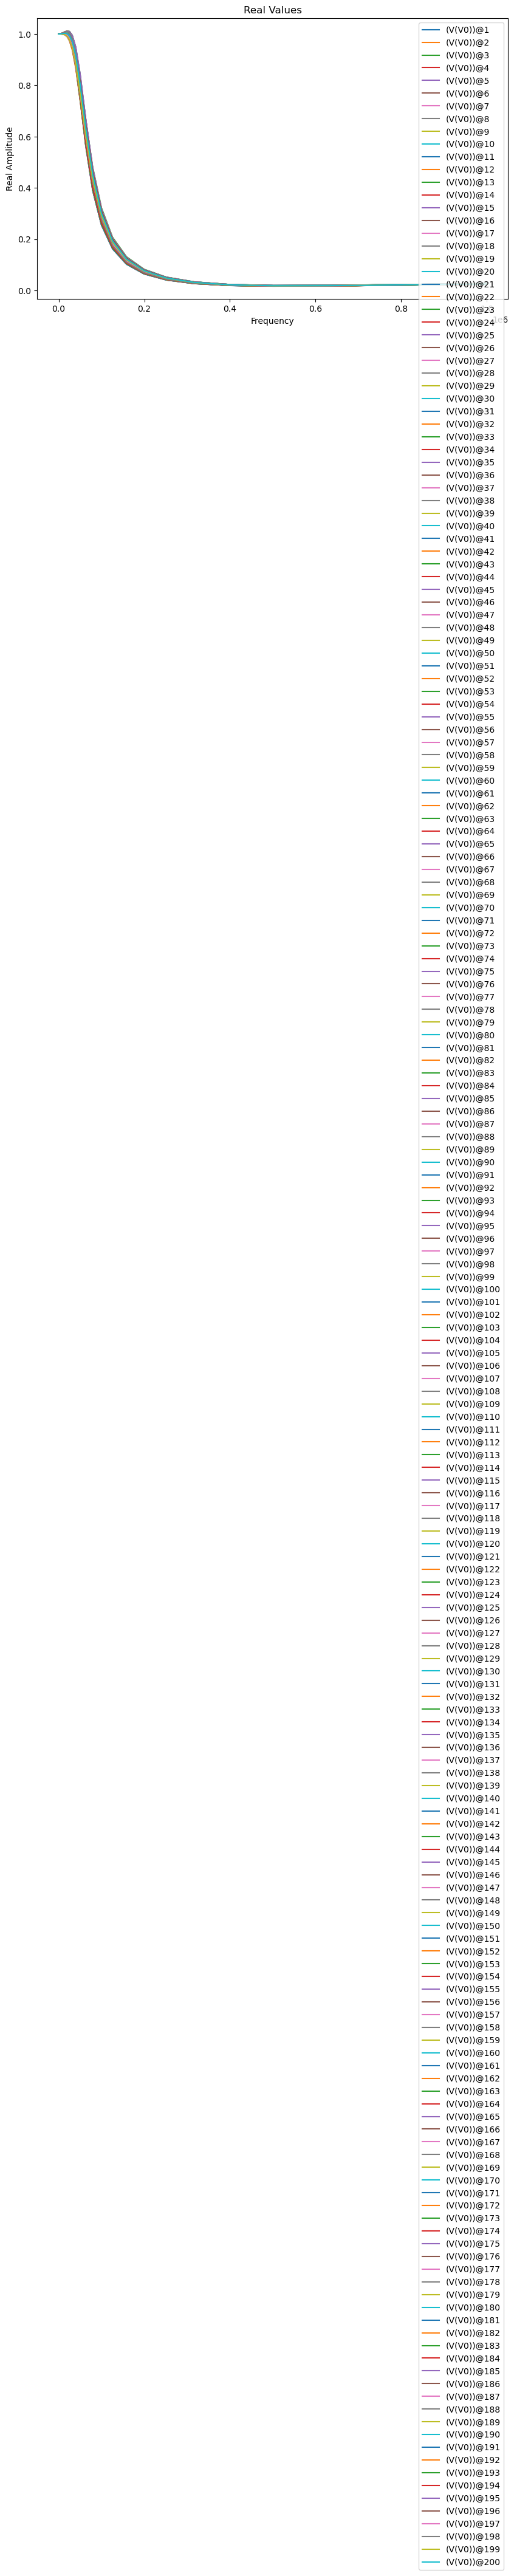

In [7]:
#  real and imaginary parts 
real_columns = [col for col in df.columns if 'V(V0)' in col and 'IMG' not in col]
imaginary_columns = [col for col in df.columns if 'V(V0)' in col and 'IMG' in col]

# real values
df_real = df[['Frequency'] + real_columns]
df_real.plot(x='Frequency', y=real_columns, figsize=(10,6))
plt.xlabel('Frequency')
plt.ylabel('Real Amplitude')
plt.title('Real Values')



In [26]:
df_real

,Frequency,(V(V0))@1,(V(V0))@2,(V(V0))@3,(V(V0))@4,(V(V0))@5,(V(V0))@6,(V(V0))@7,(V(V0))@8,(V(V0))@9,...,(V(V0))@191,(V(V0))@192,(V(V0))@193,(V(V0))@194,(V(V0))@195,(V(V0))@196,(V(V0))@197,(V(V0))@198,(V(V0))@199,(V(V0))@200
0,1.000000,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,0.999962,0.999961,0.999962,0.999961,0.999962,0.999962,0.999961,0.999961,0.999962,0.999961
1,1.258925,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,0.999962,0.999961,0.999962,0.999961,0.999962,0.999962,0.999961,0.999961,0.999962,0.999961
2,1.584893,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,0.999962,0.999961,0.999962,0.999961,0.999962,0.999962,0.999961,0.999961,0.999962,0.999961
3,1.995262,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,0.999962,0.999961,0.999962,0.999961,0.999962,0.999962,0.999961,0.999961,0.999962,0.999961
4,2.511886,0.999962,0.999961,0.999961,0.999962,0.999962,0.999961,0.999962,0.999962,0.999961,...,0.999962,0.999961,0.999962,0.999961,0.999962,0.999962,0.999961,0.999961,0.999962,0.999961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,398107.170554,0.021190,0.019905,0.020274,0.020065,0.021567,0.020609,0.021766,0.021758,0.021275,...,0.021865,0.021124,0.022783,0.019711,0.023095,0.022646,0.020979,0.020080,0.021881,0.022014
57,501187.233627,0.017965,0.017433,0.017544,0.017071,0.018203,0.017505,0.018418,0.018411,0.018123,...,0.018581,0.017718,0.019131,0.016878,0.019141,0.018679,0.017671,0.017039,0.018324,0.018290
58,630957.344480,0.018629,0.018522,0.018483,0.017754,0.018818,0.018173,0.019077,0.019061,0.018874,...,0.019303,0.018207,0.019682,0.017643,0.019474,0.018928,0.018216,0.017695,0.018797,0.018649
59,794328.234724,0.021579,0.021691,0.021565,0.020594,0.021770,0.021062,0.022087,0.022062,0.021911,...,0.022375,0.021000,0.022709,0.020515,0.022349,0.021682,0.021038,0.020519,0.021656,0.021429


In [9]:
xr=df_real.iloc[:,[1,20,40,60,80,100,120,140,160,180,200]].values
yrr=df_real.iloc[:,0].values

In [10]:
xr

array([[0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.99996151,
        0.99996154, 0.99996149, 0.99996146, 0.99996155, 0.99996153,
        0.9999615 ],
       [0.9999615 , 0.99996147, 0.99996149, 0.99996154, 0.

In [11]:
yrr

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03, 1.99526231e+03, 2.51188643e+03, 3.16227766e+03,
       3.98107171e+03, 5.01187234e+03, 6.30957344e+03, 7.94328235e+03,
       1.00000000e+04, 1.25892541e+04, 1.58489319e+04, 1.99526231e+04,
       2.51188643e+04, 3.16227766e+04, 3.98107171e+04, 5.01187234e+04,
       6.30957344e+04, 7.94328235e+04, 1.00000000e+05, 1.25892541e+05,
       1.58489319e+05, 1.99526231e+05, 2.51188643e+05, 3.16227766e+05,
      

In [12]:
yrr_cont= [1E+00,1.258925411794E+00,
1.584893192461E+00,
1.995262314969E+00,
2.51188643151E+00,
3.162277660168E+00,
3.981071705535E+00,
5.011872336273E+00,
6.309573444802E+00,
7.943282347243E+00,
1E+01,
1.258925411794E+01,
1.584893192461E+01,
1.995262314969E+01,
2.51188643151E+01,
3.162277660168E+01,
3.981071705535E+01,
5.011872336273E+01,
6.309573444802E+01,
7.943282347243E+01,
1E+02,
1.258925411794E+02,
1.584893192461E+02,
1.995262314969E+02,
2.51188643151E+02,
3.162277660168E+02,
3.981071705535E+02,
5.011872336273E+02,
6.309573444802E+02,
7.943282347243E+02,
1E+03,
1.258925411794E+03,
1.584893192461E+03,
1.995262314969E+03,
2.51188643151E+03,
3.162277660168E+03,
3.981071705535E+03,
5.011872336273E+03,
6.309573444802E+03,
7.943282347243E+03,
1E+04,
1.258925411794E+04,
1.584893192461E+04,
1.995262314969E+04,
2.51188643151E+04,
3.162277660168E+04,
3.981071705535E+04,
5.011872336273E+04,
6.309573444802E+04,
7.943282347243E+04,
1E+05,
1.258925411794E+05,
1.584893192461E+05,
1.995262314969E+05,
2.51188643151E+05,
3.162277660168E+05,
3.981071705535E+05,
5.011872336273E+05,
6.309573444802E+05,
7.943282347243E+05,
1E+06]

# Define the number of bins
num_bins = 20

bins = np.linspace(min(yrr_cont), max(yrr_cont), num_bins + 1)
yr = np.digitize(yrr_cont, bins)

print(yr)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
  2  2  2  3  4  4  6  7  8 11 13 16 21]


In [13]:
yrr_cont= [1E+00,1.258925411794E+00,
1.584893192461E+00,
1.995262314969E+00,
2.51188643151E+00,
3.162277660168E+00,
3.981071705535E+00,
5.011872336273E+00,
6.309573444802E+00,
7.943282347243E+00,
1E+01,
1.258925411794E+01,
1.584893192461E+01,
1.995262314969E+01,
2.51188643151E+01,
3.162277660168E+01,
3.981071705535E+01,
5.011872336273E+01,
6.309573444802E+01,
7.943282347243E+01,
1E+02,
1.258925411794E+02,
1.584893192461E+02,
1.995262314969E+02,
2.51188643151E+02,
3.162277660168E+02,
3.981071705535E+02,
5.011872336273E+02,
6.309573444802E+02,
7.943282347243E+02,
1E+03,
1.258925411794E+03,
1.584893192461E+03,
1.995262314969E+03,
2.51188643151E+03,
3.162277660168E+03,
3.981071705535E+03,
5.011872336273E+03,
6.309573444802E+03,
7.943282347243E+03,
1E+04,
1.258925411794E+04,
1.584893192461E+04,
1.995262314969E+04,
2.51188643151E+04,
3.162277660168E+04,
3.981071705535E+04,
5.011872336273E+04,
6.309573444802E+04,
7.943282347243E+04,
1E+05,
1.258925411794E+05,
1.584893192461E+05,
1.995262314969E+05,
2.51188643151E+05,
3.162277660168E+05,
3.981071705535E+05,
5.011872336273E+05,
6.309573444802E+05,
7.943282347243E+05,
1E+06]

# Define the number of bins
num_bins = 20

bins = np.linspace(min(yrr_cont), max(yrr_cont), num_bins + 1)
yr = np.digitize(yrr_cont, bins)

print(yr)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
  2  2  2  3  4  4  6  7  8 11 13 16 21]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(xr,yr,test_size=0.25,random_state=0)

In [15]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)
from sklearn.svm import SVC #support vector classifier 
classifier=SVC(kernel='rbf', random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  1,  0,  0]])

In [18]:
print("The Accuracy is :", accuracy_score(y_test,y_pred))

The Accuracy is : 0.875


In [19]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)

In [20]:
print("Confusion Matrix")
print(cnf_matrix)
print("\n")
print("Accuracy of Logistic Regression is:", acc)

Confusion Matrix
[[14  0  0  0]
 [ 0  0  0  0]
 [ 0  1  0  0]
 [ 0  1  0  0]]


Accuracy of Logistic Regression is: 0.875


In [21]:
print("\n Classification report for %s:\n%s\n" % (lr, metrics.classification_report(y_test, pred)))


 Classification report for LogisticRegression():
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           4       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.88        16
   macro avg       0.25      0.25      0.25        16
weighted avg       0.88      0.88      0.88        16




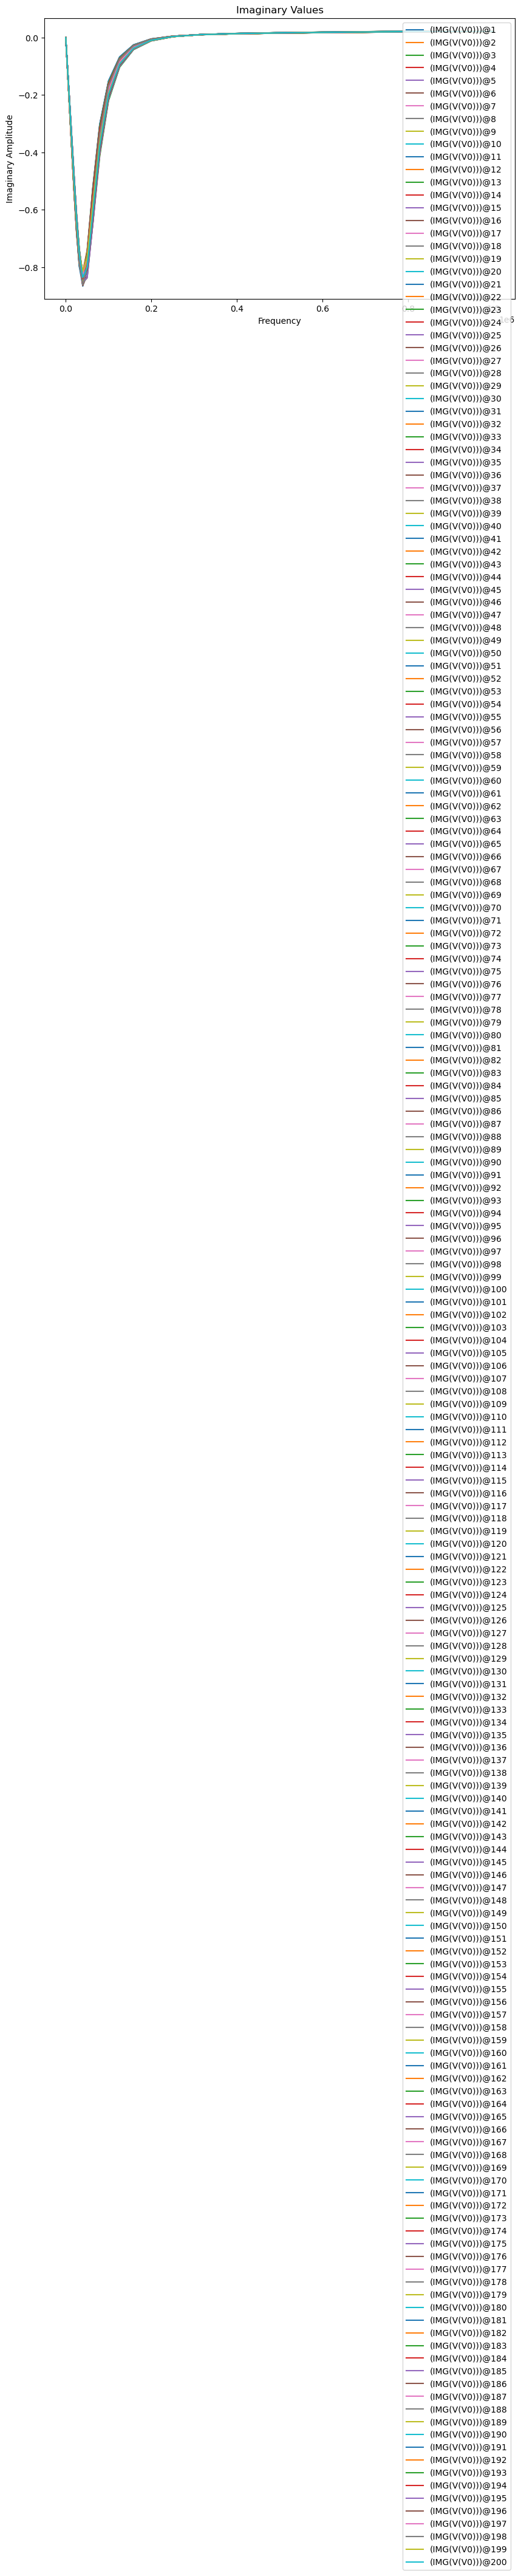

In [24]:
df_imaginary = df[['Frequency'] + imaginary_columns]
df_imaginary.plot(x='Frequency', y=imaginary_columns, figsize=(10, 6))
plt.xlabel('Frequency')
plt.ylabel('Imaginary Amplitude')
plt.title('Imaginary Values')

plt.show()

In [23]:
df_imaginary.head()

,Frequency,(IMG(V(V0)))@1,(IMG(V(V0)))@2,(IMG(V(V0)))@3,(IMG(V(V0)))@4,(IMG(V(V0)))@5,(IMG(V(V0)))@6,(IMG(V(V0)))@7,(IMG(V(V0)))@8,(IMG(V(V0)))@9,...,(IMG(V(V0)))@191,(IMG(V(V0)))@192,(IMG(V(V0)))@193,(IMG(V(V0)))@194,(IMG(V(V0)))@195,(IMG(V(V0)))@196,(IMG(V(V0)))@197,(IMG(V(V0)))@198,(IMG(V(V0)))@199,(IMG(V(V0)))@200
0,1.000000,-0.000026,-0.000028,-0.000027,-0.000027,-0.000025,-0.000027,-0.000025,-0.000026,-0.000025,...,-0.000026,-0.000026,-0.000025,-0.000027,-0.000025,-0.000025,-0.000027,-0.000026,-0.000027,-0.000026
1,1.258925,-0.000033,-0.000035,-0.000034,-0.000034,-0.000032,-0.000034,-0.000032,-0.000032,-0.000032,...,-0.000033,-0.000033,-0.000032,-0.000034,-0.000032,-0.000032,-0.000034,-0.000033,-0.000034,-0.000032
2,1.584893,-0.000041,-0.000044,-0.000043,-0.000043,-0.000040,-0.000042,-0.000040,-0.000041,-0.000040,...,-0.000041,-0.000041,-0.000040,-0.000043,-0.000040,-0.000040,-0.000043,-0.000041,-0.000042,-0.000040
3,1.995262,-0.000052,-0.000056,-0.000054,-0.000055,-0.000050,-0.000053,-0.000050,-0.000051,-0.000050,...,-0.000052,-0.000052,-0.000051,-0.000054,-0.000050,-0.000050,-0.000054,-0.000052,-0.000053,-0.000051
4,2.511886,-0.000066,-0.000070,-0.000068,-0.000069,-0.000063,-0.000067,-0.000063,-0.000065,-0.000063,...,-0.000065,-0.000065,-0.000064,-0.000068,-0.000063,-0.000063,-0.000067,-0.000065,-0.000067,-0.000064


In [24]:
xi=df_imaginary.iloc[:,[1,20,40,60,80,100,120,140,160,180,200]].values
yii=df_imaginary.iloc[:,0].values

In [25]:
xi

array([[-2.61385663e-05, -2.64695798e-05, -2.60363309e-05,
        -2.61311749e-05, -2.47862832e-05, -2.51309956e-05,
        -2.70558171e-05, -2.57807347e-05, -2.53107568e-05,
        -2.57996913e-05, -2.55182535e-05],
       [-3.29065053e-05, -3.33232267e-05, -3.27777987e-05,
        -3.28972001e-05, -3.12040818e-05, -3.16380490e-05,
        -3.40612557e-05, -3.24560220e-05, -3.18643549e-05,
        -3.24798870e-05, -3.21255778e-05],
       [-4.14268358e-05, -4.19514568e-05, -4.12648037e-05,
        -4.14151211e-05, -3.92836115e-05, -3.98299439e-05,
        -4.28805804e-05, -4.08597109e-05, -4.01148461e-05,
        -4.08897551e-05, -4.04437062e-05],
       [-5.21532963e-05, -5.28137551e-05, -5.19493100e-05,
        -5.21385484e-05, -4.94551368e-05, -5.01429285e-05,
        -5.39834523e-05, -5.14393284e-05, -5.05015992e-05,
        -5.14771518e-05, -5.09156095e-05],
       [-6.56571100e-05, -6.64885784e-05, -6.54003064e-05,
        -6.56385436e-05, -6.22603284e-05, -6.31262069e-05,
  

In [26]:
yii

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03, 1.99526231e+03, 2.51188643e+03, 3.16227766e+03,
       3.98107171e+03, 5.01187234e+03, 6.30957344e+03, 7.94328235e+03,
       1.00000000e+04, 1.25892541e+04, 1.58489319e+04, 1.99526231e+04,
       2.51188643e+04, 3.16227766e+04, 3.98107171e+04, 5.01187234e+04,
       6.30957344e+04, 7.94328235e+04, 1.00000000e+05, 1.25892541e+05,
       1.58489319e+05, 1.99526231e+05, 2.51188643e+05, 3.16227766e+05,
      

In [27]:
yii_cont= [1E+00,1.258925411794E+00,
1.584893192461E+00,
1.995262314969E+00,
2.51188643151E+00,
3.162277660168E+00,
3.981071705535E+00,
5.011872336273E+00,
6.309573444802E+00,
7.943282347243E+00,
1E+01,
1.258925411794E+01,
1.584893192461E+01,
1.995262314969E+01,
2.51188643151E+01,
3.162277660168E+01,
3.981071705535E+01,
5.011872336273E+01,
6.309573444802E+01,
7.943282347243E+01,
1E+02,
1.258925411794E+02,
1.584893192461E+02,
1.995262314969E+02,
2.51188643151E+02,
3.162277660168E+02,
3.981071705535E+02,
5.011872336273E+02,
6.309573444802E+02,
7.943282347243E+02,
1E+03,
1.258925411794E+03,
1.584893192461E+03,
1.995262314969E+03,
2.51188643151E+03,
3.162277660168E+03,
3.981071705535E+03,
5.011872336273E+03,
6.309573444802E+03,
7.943282347243E+03,
1E+04,
1.258925411794E+04,
1.584893192461E+04,
1.995262314969E+04,
2.51188643151E+04,
3.162277660168E+04,
3.981071705535E+04,
5.011872336273E+04,
6.309573444802E+04,
7.943282347243E+04,
1E+05,
1.258925411794E+05,
1.584893192461E+05,
1.995262314969E+05,
2.51188643151E+05,
3.162277660168E+05,
3.981071705535E+05,
5.011872336273E+05,
6.309573444802E+05,
7.943282347243E+05,
1E+06]

# Define the number of bins
num_bins = 20

bins = np.linspace(min(yii_cont), max(yii_cont), num_bins + 1)
yi = np.digitize(yii_cont, bins)

print(yi)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
  2  2  2  3  4  4  6  7  8 11 13 16 21]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(xi,yi,test_size=0.25,random_state=0)

In [29]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)
from sklearn.svm import SVC #support vector classifier 
classifier=SVC(kernel='rbf', random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [30]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1,  0,  0],
       [ 1,  0,  0]])

In [31]:
print("The Accuracy is :", accuracy_score(y_test,y_pred))

The Accuracy is : 0.875


In [32]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)
print("Confusion Matrix")
print(cnf_matrix)
print("\n")
print("Accuracy of Logistic Regression is:", acc)

Confusion Matrix
[[14  0  0]
 [ 1  0  0]
 [ 1  0  0]]


Accuracy of Logistic Regression is: 0.875


In [33]:
print("\n Classification report for %s:\n%s\n" % (lr, metrics.classification_report(y_test, pred)))


 Classification report for LogisticRegression():
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.88        16
   macro avg       0.29      0.33      0.31        16
weighted avg       0.77      0.88      0.82        16


